[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset: (1000, 3)
label
ai       500
human    500
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - accuracy: 0.7329 - loss: 1.0172 - val_accuracy: 1.0000 - val_loss: 0.4251 - learning_rate: 0.0010
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9959 - loss: 0.3513 - val_accuracy: 1.0000 - val_loss: 0.1801 - learning_rate: 0.0010
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 1.0000 - loss: 0.1817 - val_accuracy: 1.0000 - val_loss: 0.1223 - learning_rate: 0.0010
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.9991 - loss: 0.1222 - val_accuracy: 1.0000 - val_loss: 0.0886 - learning_rate: 0.0010
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 1.0000 - loss: 0.0887 - val_accuracy: 1.0000 - val_loss: 0.0669 - learning_rate: 0.0010
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 1.0000 - loss: 0.0680 - val_accuracy: 1.0000 - val_loss: 0.0533 - learning_rate: 0.0010
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 1.0000 - loss: 0.0541 -

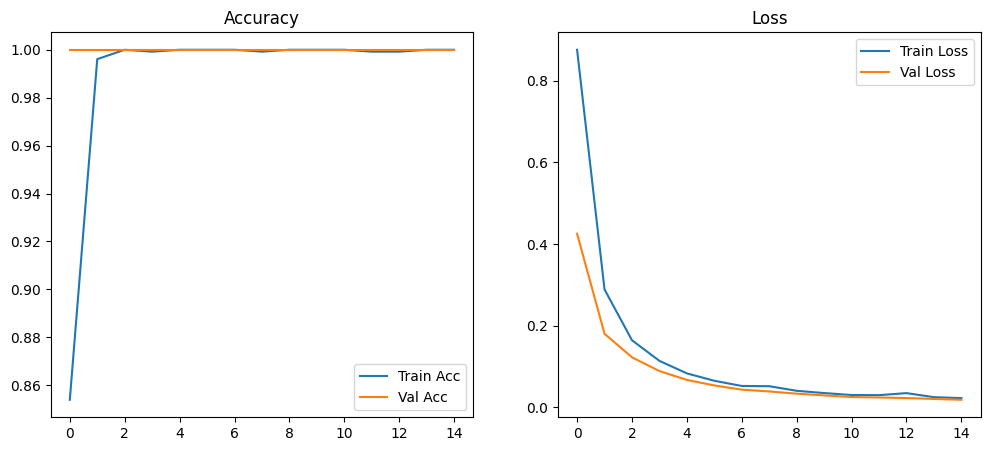

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step

Classification Report:
               precision    recall  f1-score   support

       human       1.00      1.00      1.00       200
          ai       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy: 1.0
ROC-AUC: 1.0


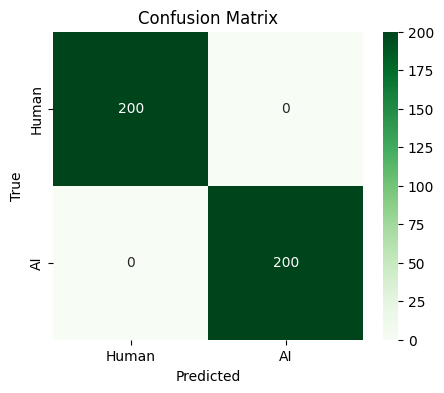

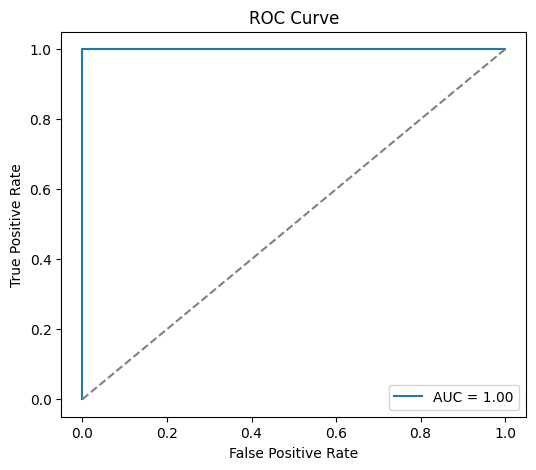

In [ ]:
# ============================================
# STEP 1. Import libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

nltk.download('punkt')
nltk.download('punkt_tab')

# ============================================
# STEP 2. Load dataset
# ============================================
data_path = "kazakh_ai_text_detection_dataset.csv"
df = pd.read_csv(data_path)
df['text'] = df['text'].astype(str)
df.dropna(inplace=True)
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'\b(ai|chatgpt|жасанды интеллект|нейрон)\b', '', x.lower()))

print("Dataset:", df.shape)
print(df['label'].value_counts())

# ============================================
# STEP 3. Data Augmentation (adds noise)
# ============================================
import random
def augment_text(text):
    words = text.split()
    # random deletion
    if len(words) > 5 and random.random() < 0.3:
        del words[random.randint(0, len(words)-1)]
    # random swap
    if len(words) > 4 and random.random() < 0.3:
        i, j = random.sample(range(len(words)), 2)
        words[i], words[j] = words[j], words[i]
    return ' '.join(words)

augmented = df.copy()
augmented['clean_text'] = augmented['clean_text'].apply(augment_text)
df = pd.concat([df, augmented], ignore_index=True).sample(frac=1).reset_index(drop=True)

# ============================================
# STEP 4. Data Preparation
# ============================================
X = df['clean_text'].values
y = df['label'].apply(lambda x: 1 if x=='ai' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tokenizer = Tokenizer(num_words=8000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

max_len = 60
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# ============================================
# STEP 5. Smaller, Regularized Model
# ============================================
model = Sequential([
    Embedding(input_dim=8000, output_dim=64, input_length=max_len),
    SpatialDropout1D(0.4),
    Bidirectional(LSTM(32, kernel_regularizer=l2(0.002), recurrent_dropout=0.3)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# ============================================
# STEP 6. Training with regularization
# ============================================
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[es, lr],
    verbose=1
)

# ============================================
# STEP 7. Training Curves
# ============================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# ============================================
# STEP 8. Evaluation
# ============================================
y_pred = (model.predict(X_test_seq) > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['human','ai']))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Human','AI'], yticklabels=['Human','AI'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
